# Uniparametric models

Consider a random variable $Y$, whose likelihood, when it takes the value $y$ and the parameters $\theta$ take the value $t$, is given by

$$p_{Y|\theta}(y|t).$$

For example, if $Y$ is variable with a normal distribution with mean $\theta$ and unit variance, then

$$p_{Y|\theta}(y|t)=\frac{1}{\sqrt{2\pi}}\exp\left\lbrace-\frac{(y-t)^2}{2}\right\rbrace 1_{y\in\mathbb{R}}.$$

In the Bayesian argot, it is usual to to make use of abused of notations, sometimes even dangerous, for example

$$p_{Y|\theta}(y|t)$$

would be written as

$$p(Y|\theta).$$

## Notation

Before moving forward, it is good to introduce at this point the notation that we are going to use throughout this book. However, sooner than later, we are going to follow the abuse of notation usual in the field of Bayesian statistics.

- Random variables: $Y, \theta$.
- Sample space: $\mathcal{Y}$, $Y\in\mathcal{Y}$.
- Parametric space: $\Theta$, $\theta\in\Theta$.
- Random sample: $\mathbf{Y}=(Y_1,\ldots,Y_n)$.
- Observed sample: $\mathbf{y}=(y_1,\ldots,y_n)$.
- Prior distribution or *a priori*: $p(\theta)$.
- Likelihood: $p(Y|\theta)$.
- Likelihood of the sample: $p(\mathbf{Y}|\theta)$.
- Evidence: $p(\mathbf{Y})$.
- Posterior distribution or *a posteriori*: $p(\theta|\mathbf{Y})$.

## Posterior distribution

The prior distribution of probability is the distribution based on the previous information (expertise of specialists, historical data, etc.), prior to obtain new measurements. Then, we get new data (we obtain evidence) and combine this new information with the prior distribution using Bayes' rule to obtain the posterior distribution of probability:

$$p_{\theta|\mathbf{Y}}(t|\mathbf{y})=\frac{p_{\mathbf{Y}|\theta}(\mathbf{y}|t)p_\theta(t)}{p_\mathbf{Y}(\mathbf{y})}=\frac{p_{\mathbf{Y}|\theta}(\mathbf{y}|t)p_\theta(t)}{\int_\Theta p_{\mathbf{Y}|\theta}(\mathbf{y}|\tilde t)p_\theta(\tilde t)d\tilde t}$$

With the usual abuse of notation of Bayesian statistics, the previous result would be written as:

$$p(\theta|\mathbf{Y})=\frac{p(\mathbf{Y}|\theta)p(\theta)}{p(\mathbf{Y})}=\frac{p(\mathbf{Y}|\theta)p(\theta)}{\int_\Theta p(\mathbf{Y}|\tilde\theta)p(\tilde\theta)d\tilde\theta}$$

or, equivalentely:

$$p(\theta|\mathbf{Y})\propto p(\mathbf{Y}|\theta)p(\theta).$$

## Beta-Binomial

Asume that $Y_i|\theta\overset{iid}{\sim}\text{Bernoulli}(\theta)$ and the uncertainty about $\theta\in (0,1)$ is quantified through $\theta\sim\textsf{Beta}(\alpha, \beta)$. We get the observations $\mathbf{y}=(y_1,\ldots,y_n)$, then

$$p(\mathbf{Y}|\theta)=\theta^{\sum_{i=1}^n y_i}(1-\theta)^{n-\sum_{i=1}^n y_i}\prod_{i=1}^n1_{\{0,1\}}(y_i)$$

and

$$p(\theta)=B(\alpha,\beta)^{-1}\theta^{\alpha-1}(1-\theta)^{\beta-1}1_{(0,1)}(\theta).$$

Thus,

$$p(\theta|\mathbf{Y})\propto \theta^{\alpha+\sum_{i=1}^n y_i-1}(1-\theta)^{\beta+n-\sum_{i=1}^n y_i-1}1_{(0,1)}(\theta),$$

that is,

$$\theta|\mathbf{Y}\sim\textsf{Beta}\left(\alpha+\sum_{i=1}^n y_i, \beta+n-\sum_{i=1}^n y_i\right).$$

Remember that if $Y_1\ldots,Y_n|\theta\overset{iid}{\sim}\textsf{Bernoulli}(\theta)$, then

$$Z=\sum_{i=1}^n Y_i|\theta\sim\textsf{Binomial}(n,\theta).$$

Therefore, if

$$\theta\sim\textsf{Beta}(\alpha, \beta),$$

we conclude that

$$\theta|Z\sim\textsf{Beta}(\alpha+Z,\beta+n-Z).$$

### Example

Assume that $Y|\theta\sim\textsf{Bernoulli}(\theta)$ and that we don't have information about $\theta$ to prefer some value over another, so we model $\theta\sim\textsf{Beta}(1,1)$ (i.e. $\theta\sim\textsf{Uniform}(0,1)$). Then, we get a simple random sample (i.e. we obtain an iid sample) $\mathbf{y}=(1,0,1,1,1,0,1,0,1)$, or equivalently $z=6$ and $n=9$. Next figure shows the prior and posterior distributions.

```{image} Images/PriorPosteriorBetaBinomial.png
:alt: PriorPosteriorBetaBinomial
:align: center
```

## Principle of indifference 

Analyzing the binomial model, Laplace assumed the uniform distribution as prior arguing what he called the *principle of indifference*, also called *principle of insufficient reason*, which stablishes that the uniform assumption is appropriate when we have no information about $\theta$, that is

$$
\begin{aligned}
\theta & \sim \textsf{Beta}(1,1), \\
Y|\theta & \sim \textsf{Binomial}(n,\theta) \\
\Rightarrow \theta|Y & \sim \textsf{Beta}(Y+1, n-Y+1).
\end{aligned}
$$

### Proportion of girls' births

One of the first applications of this model made by Laplace was the estimation of the proportion of girls' births, $\theta$, in a population. Laplace knew that between 1745 and 1770, 241945 girls and 251527 boys were born in Paris, if $Y$ denotes the number of girls' births, then

$$\theta|Y\sim\textsf{Beta}(241946, 251528).$$

With this result, we can show that it is more probable that a boy is born than a girl, as it is shown in the next cell, which calculates $\mathbb{P}(\theta>0.5)$.

In [1]:
from scipy.stats import beta

fem_births = 241945
mal_births = 251527

beta.sf(0.5, fem_births+1, mal_births+1)

1.1460584901546728e-42

### Probability of a girl birth given placenta previa

Placenta previa is an unusual condition of pregnancy in which the placenta is implanted low in the uterus. An early study concerning the sex of placenta previa births in Germany found of a total of 980 births, 437 were female.

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.special import logit, expit

In [3]:
births = 987
fem_births = 437

Posterior mean

In [4]:
beta.mean(fem_births+1, births-fem_births+1).round(3)

0.443

Posterior interval

In [5]:
LowInterval = beta.mean(fem_births+1, births-fem_births+1) - 2 * beta.std(fem_births+1, births-fem_births+1)
UppInterval = beta.mean(fem_births+1, births-fem_births+1) + 2 * beta.std(fem_births+1, births-fem_births+1)

round(LowInterval,3), round(UppInterval,3)

(0.411, 0.474)

We can also simulate a sample from the posterior to make inferences

In [6]:
PosteriorSample = beta.rvs(size=1000, a=fem_births+1, b=births-fem_births+1)

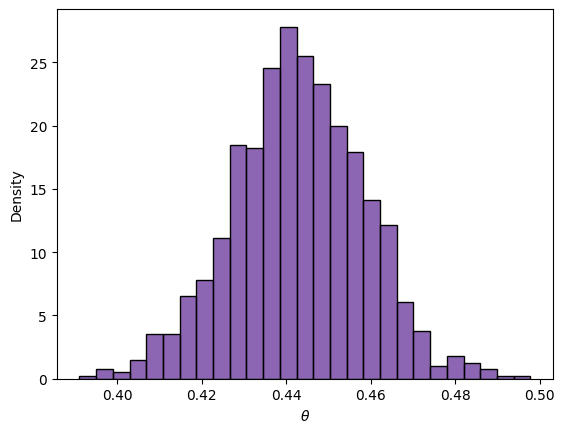

In [7]:
sns.histplot(PosteriorSample, color='rebeccapurple', stat='density')
_ = plt.xlabel(r'$\theta$')

In [8]:
np.quantile(PosteriorSample, [0.025, 0.975]).round(3)

array([0.411, 0.472])

The normal approximation is generally improved by applying it the logit transform, $\log (\frac{\theta}{1-\theta})$, which transforms the parameter space from the unit interval to the real line.

In [9]:
LogitPosteriorSample = logit(PosteriorSample)

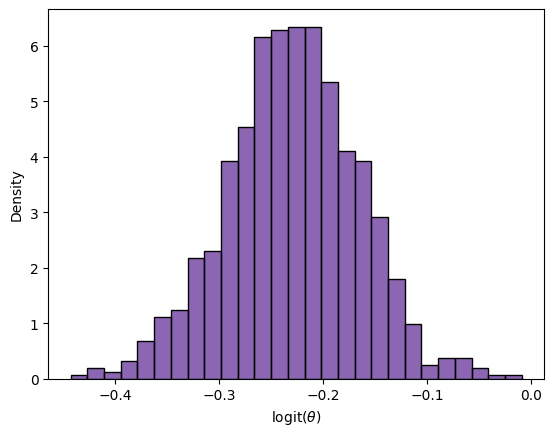

In [10]:
sns.histplot(LogitPosteriorSample, color='rebeccapurple', stat='density')
_ = plt.xlabel(r'logit$(\theta)$')

In [11]:
LowLogitInterval = LogitPosteriorSample.mean() - 2 * LogitPosteriorSample.std()
UppLogitInterval = LogitPosteriorSample.mean() + 2 * LogitPosteriorSample.std()

expit(LowLogitInterval).round(3), expit(UppLogitInterval).round(3)

(0.412, 0.474)

### Cells production of protein

Assume that a particular population of cells can be in one of three states of protein production: A, B and C, corresponding to low, mid and high production, respectively. If the population is in the state A, we expect that 20% of cells are producing the protein, if it is in the state B we expect 50% and if it is in state C we expect 70%

We take a random sample of 20 cells and verify if each one of them is in production of the protein (the result of the equipment is 1 if the cell is in production and 0 if not). In this sample, we found that 12 cells were in production and the rest were not. What is the probability that the population is in each one of the states?

The next cells show two ways to find the answer to the question.

In [12]:
theta_A = 0.2
theta_B = 0.5
theta_C = 0.7

print(f"Prob. A: {theta_A**12 * (1-theta_A)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8):.4f}")
print(f"Prob. B: {theta_B**12 * (1-theta_B)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8):.4f}")
print(f"Prob. C: {theta_C**12 * (1-theta_C)**8 / (theta_A**12 * (1-theta_A)**8 + theta_B**12 * (1-theta_B)**8 + theta_C**12 * (1-theta_C)**8):.4f}")

Prob. A: 0.0004
Prob. B: 0.5120
Prob. C: 0.4876


In [13]:
from scipy.stats import binom

p_A = binom.pmf(12, 20, theta_A)
p_B = binom.pmf(12, 20, theta_B)
p_C = binom.pmf(12, 20, theta_C)

print(f"Prob. A: {p_A/(p_A+p_B+p_C):.4f}")
print(f"Prob. B: {p_B/(p_A+p_B+p_C):.4f}")
print(f"Prob. C: {p_C/(p_A+p_B+p_C):.4f}")

Prob. A: 0.0004
Prob. B: 0.5120
Prob. C: 0.4876


## Predictive distributions

In many cases we more interested in the behavior of future observations of the phenomenon than on some vector of parameters $\theta$. Usually, in frequentist statistics we solve this problem using a punctual estimator of $\theta$ based on the observed sample, $\hat{\theta}$, who is later plug in $p(Y|\theta)$, that is, we use $p(Y|\hat\theta)$ to predict the behavior of future observations.